In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import imp
import seaborn as sns
import SAFutils

%matplotlib inline

In [2]:
import pickle

In [3]:
holder = pickle.load(open("aggregated.p", "rb"))

## Daily Stops 

I think I should account for the outlieing days in order to get a better idea of the c

In [10]:
full_day_series = []
for year, data in sorted(holder["dayofyear"].items()):
    full_day_series += list(data)

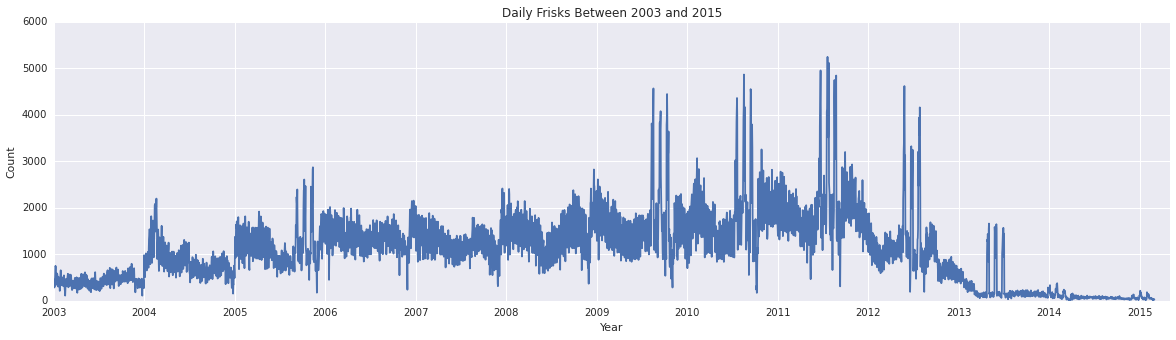

In [32]:
plt.figure(figsize=(20, 5))
plt.plot(full_day_series)
plt.xticks([365 * ix for ix in range(0, 13)], sorted(holder["dayofyear"].keys()))
plt.title("Daily Frisks Between 2003 and 2015")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()

## Weekly Stops

In [25]:
full_week_series = []
for year, data in sorted(holder["weekofyear"].items()):
    full_week_series += list(data)

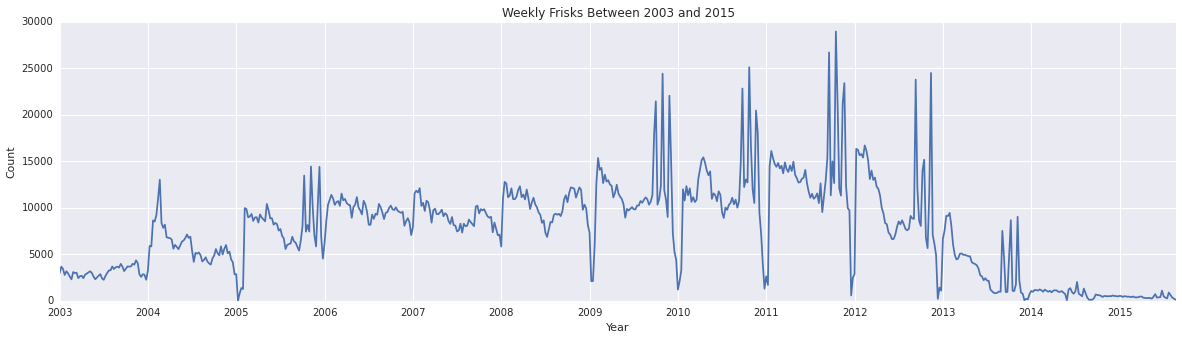

In [34]:
plt.figure(figsize=(20, 5))
plt.xticks([52 * ix for ix in range(0, 13)], sorted(holder["dayofyear"].keys()))
plt.title("Weekly Frisks Between 2003 and 2015")
plt.ylabel("Count")
plt.xlabel("Year")
plt.plot(full_week_series)
plt.show()

## Monthy Stops

In [7]:
full_month_series = []
for year, data in sorted(holder["monthofyear"].items()):
    full_month_series += list(data)

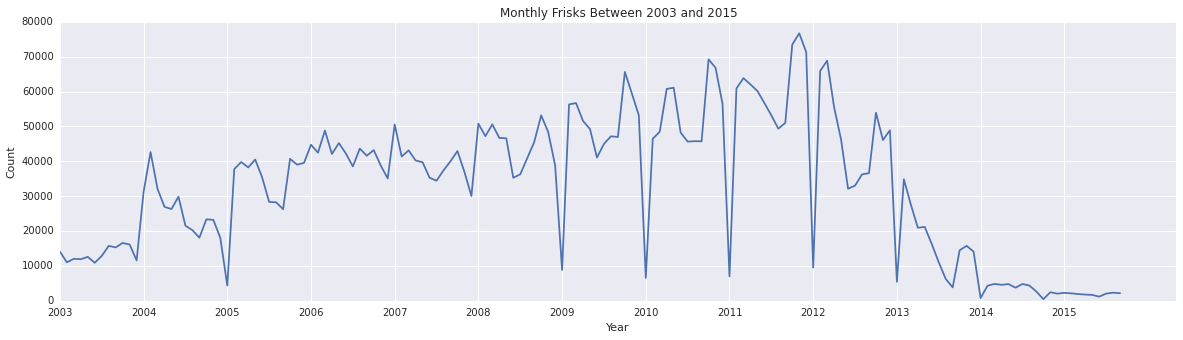

In [37]:
plt.figure(figsize=(20, 5))
plt.plot(full_month_series)
plt.xticks([12 * ix for ix in range(0, 13)], sorted(holder["dayofyear"].keys()))
plt.title("Monthly Frisks Between 2003 and 2015")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()

## Yearly Stops

In [5]:
year_series = []
for year, data in sorted(holder["monthofyear"].items()):
    year_series.append(data.sum())

year_series = pd.Series(year_series)  # Getting error when starting with Series
percent_dif = year_series.pct_change().apply(lambda x: x * 100)

#### Try to change the scale on the first y-axis
Maybe it would just be best to put these on two different axes

/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


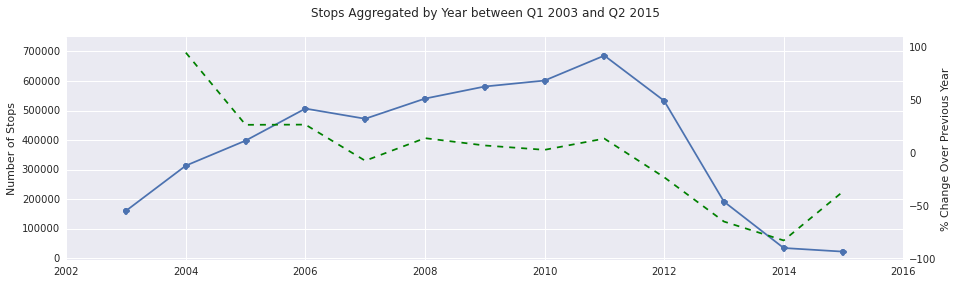

In [7]:
years = [str(x) for x in range(2003, 2016)]
# plt.figure(figsize=(, 5)) # Bank to 45

fig, host = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)
host.plot(years, year_series, marker='o')
host.set_ylim(-5000, 750000) # Give extra padding
host.set_ylabel("Number of Stops")
# host.set_yticks([str(x * 100) + "k" for x in range(0,8)])


par1 = host.twinx()
par1.plot(years, percent_dif,"--g", axes=par1,)
par1.set_ylim([-100, 110])
par1.set_ylabel("% Change Over Previous Year")
par1.grid(b=False)
par1.axhline(0, years[0], years[-1])

plt.title("Stops Aggregated by Year between Q1 2003 and Q2 2015\n")
fig.show()
# plt.show()

### Investigate 2009 to 2014 Pattern

Consider making this into a calendar heatmap using calmap. Experiment with lower years

In [63]:
for file in [str(x) + ".csv" for x in range(2009,2014)]:  # List of filenames between 2009 and 2013
    year, df = SAFutils.SAF_data_cleaner(file)
    dateGroup = df.groupby(["datestop"]).size()
    dateZip = zip(dateGroup.index, dateGroup)
    dateZip = list(dateZip)
    sortedDates = sorted(dateZip, key=lambda pair: pair[1], reverse=True)
    top10_dates = sortedDates[:10]
    bot10_dates = sortedDates[-10:]
    print("##########################################\n")
    print("\nYear: {}\n".format(year))
    print("TOP 10\n")
    for date in top10_dates:
        print("Date:{}    Count:{}".format(date[0], date[1]))
    print("---------------------------------------")
    print("BOTTOM 10\n")
    for date in bot10_dates:
        print("Date:{}    Count:{}".format(date[0], date[1]))

##########################################

Year: 2009

TOP 10
Date:2009-10-09 00:00:00    Count:4567
Date:2009-12-03 00:00:00    Count:4446
Date:2009-11-07 00:00:00    Count:4077
Date:2009-10-08 00:00:00    Count:4056
Date:2009-12-04 00:00:00    Count:3969
Date:2009-12-02 00:00:00    Count:3894
Date:2009-11-06 00:00:00    Count:3869
Date:2009-11-04 00:00:00    Count:3842
Date:2009-11-03 00:00:00    Count:3829
Date:2009-10-02 00:00:00    Count:3813
---------------------------------------
BOTTOM 10
Date:2009-07-13 00:00:00    Count:840
Date:2009-12-13 00:00:00    Count:832
Date:2009-12-26 00:00:00    Count:828
Date:2009-12-28 00:00:00    Count:797
Date:2009-12-14 00:00:00    Count:727
Date:2009-12-21 00:00:00    Count:577
Date:2009-11-26 00:00:00    Count:539
Date:2009-12-24 00:00:00    Count:503
Date:2009-12-20 00:00:00    Count:473
Date:2009-12-25 00:00:00    Count:286
##########################################

Year: 2010

TOP 10
Date:2010-11-05 00:00:00    Count:4866
Date:2010-12-02

In [65]:
import calmap

In [69]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
plt.figure(figsize=(10, 6))
# plt.subplot(2,1,1)
for i in range(3):
    calmap.yearplot(dateGroup)
plt.show()

AttributeError: 'DatetimeIndex' object has no attribute 'sort_values'